# METAS uncLib https://www.metas.ch/metas/en/home/fabe/hochfrequenz/unclib.html

In [1]:
from metas_unclib import *
import matplotlib.pyplot as plt
from sigfig import round
%matplotlib inline

In [2]:
use_mcprop(n=100000)
#use_linprop()

def uncLib_PlotHist(mcValue, xLabel='Value / A.U.', yLabel='Probability', title='Histogram of value', bins=1001, coverage=0.95):
    hObject = mcValue.net_object 
    hValues = [float(bi) for bi in hObject.values]
    y,x,_ = plt.hist(hValues, bins=bins, density=True)
    plt.xlabel(xLabel)
    plt.title(title)
    plt.ylabel(yLabel)
    
    # stat over all
    coverage_interval=[np.mean(hValues), np.percentile(hValues, ((1.0-coverage)/2.0) * 100), np.percentile(hValues, (coverage+((1.0-coverage)/2.0)) * 100)]
    plt.axvline( coverage_interval[0])
    plt.axvline( coverage_interval[1])
    plt.axvline( coverage_interval[2])
    outString = round(str(coverage_interval[0]), uncertainty=str((coverage_interval[2]-coverage_interval[1])/2))
    plt.text( coverage_interval[2], max(y)/2, outString)
    plt.show()
    return [[y,x], coverage_interval]

# Measurement Uncertainty Simplest Possible Example

## Define the parameter for the calibration factor

In [3]:
k_e = ufloat(0.01, 0.0000045)

In [4]:
k_e

0.010000004762501284 ± 4.5022867210566e-06

## Define the parameter for the photometer reading

In [5]:
Y_e = ufloat(2673.3,1.)

In [6]:
Y_e

2673.299240090072 ± 0.9994712929594626

## Define the parameter for the distance measurement

In [7]:
d=ufloat(25.0000, 0.0025)

In [8]:
d

25.000000251990663 ± 0.0024933643756621443

# The Model

In [9]:
I=k_e*Y_e*d**2

In [10]:
I

16708.128713143295 ± 10.334104685347619

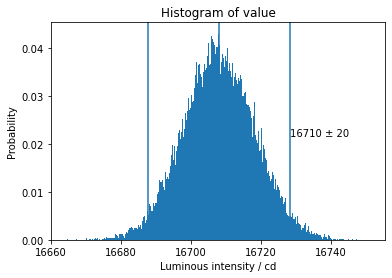

Mean: 16708.128713143346, I0: 16687.955968401075, I1: 16728.459900861442


In [11]:
[h, result_vecotr] = uncLib_PlotHist(I, xLabel='Luminous intensity / cd')
print('Mean: {}, I0: {}, I1: {}'.format(result_vecotr[0], result_vecotr[1], result_vecotr[2]))


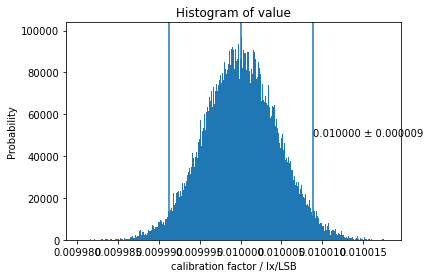

In [12]:
h=uncLib_PlotHist(k_e, xLabel='calibration factor / lx/LSB')